In [1]:
import sys;sys.path.append("..")
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from devml.post_processing import (git_churn_df, file_len, git_populate_file_metatdata)

In [3]:
df = git_churn_df(path="/Users/noahgift/src/linux")

2017-10-22 10:02:53,055 - devml.post_processing - INFO - Running churn cmd: [git log --name-only --pretty=format:] at path [/Users/noahgift/src/linux]


In [4]:
metadata_df = git_populate_file_metatdata(df)

In [5]:
metadata_df.sort_values(by="churn_count", ascending=False).head(10)

,files,churn_count,line_count,extension,relative_churn
1,b'MAINTAINERS',4595,14942.0,,0.31
2,b'drivers/gpu/drm/i915/intel_display.c',3296,15493.0,.c,0.21
3,b'drivers/gpu/drm/i915/i915_drv.h',2315,4343.0,.h,0.53
4,b'drivers/gpu/drm/i915/i915_gem.c',1678,5392.0,.c,0.31
5,b'sound/pci/hda/patch_realtek.c',1542,7931.0,.c,0.19
6,b'kernel/sched.c',1359,NaN,.c,NaN
7,b'include/linux/sched.h',1331,1669.0,.h,0.80
8,b'arch/x86/kvm/x86.c',1287,8817.0,.c,0.15
9,b'drivers/gpu/drm/i915/intel_pm.c',1287,9262.0,.c,0.14
10,b'arch/arm/Kconfig',1286,2217.0,,0.58


In [6]:
metadata_df.median()

churn_count         4.00
line_count        143.00
relative_churn      0.05
dtype: float64

In [7]:
from devml.post_processing import git_deleted_files
deletion_counts = git_deleted_files("/Users/noahgift/src/linux")

2017-10-22 10:04:12,282 - devml.post_processing - INFO - Running del cmd: [git log --diff-filter=D --summary | grep delete] at path [/Users/noahgift/src/linux]


In [8]:
all_files = metadata_df['files']
deleted_files = deletion_counts['files']
membership = all_files.isin(deleted_files)

In [9]:
metadata_df["deleted_files"] = membership

In [10]:
metadata_df.loc[metadata_df["deleted_files"] == True].median()

churn_count        3.00
line_count        79.00
relative_churn     0.12
deleted_files      1.00
dtype: float64

In [11]:
metadata_df.loc[metadata_df["deleted_files"] == False].median()

churn_count         5.00
line_count        144.00
relative_churn      0.05
deleted_files       0.00
dtype: float64

In [12]:
metadata_df.count()

files             106491
churn_count       106491
line_count         61276
extension         106491
relative_churn     61276
deleted_files     106491
dtype: int64

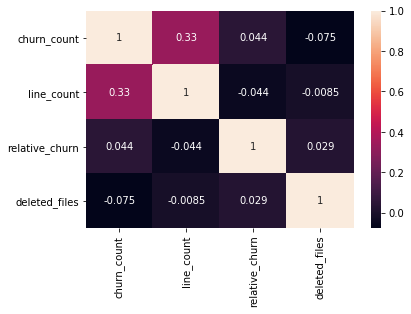

In [13]:
sns.heatmap(metadata_df.corr(), annot=True)

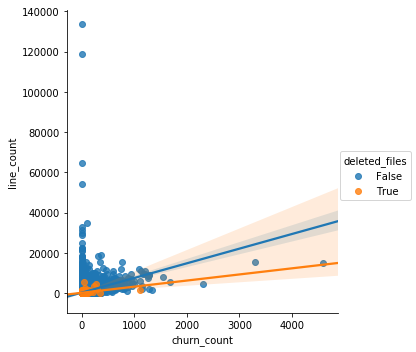

In [14]:
sns.lmplot(x="churn_count", y="line_count", hue="deleted_files", data=metadata_df)

In [15]:
import devml
df = devml.mkdata.create_org_df(path="/Users/noahgift/src/linux/")

2017-10-22 10:05:00,830 - devml.mkdata - INFO - Found repo: /Users/noahgift/src/linux/init
2017-10-22 10:05:00,831 - devml.mkdata - INFO - Processing Repo: /Users/noahgift/src/linux/init
2017-10-22 10:05:00,853 - devml.mkdata - INFO - Repo Name: b'linux'
2017-10-22 10:05:10,075 - devml.mkdata - ERROR - utf8 encoding is incorrect, trying ISO-8859-1
Traceback (most recent call last):
  File "../devml/mkdata.py", line 46, in log_to_dict
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 69960305: invalid continuation byte
2017-10-22 10:05:12,829 - devml.mkdata - INFO - Found 656006 Messages For Repo: b'linux'
2017-10-22 10:05:12,843 - devml.mkdata - INFO - Found repo: /Users/noahgift/src/linux/crypto
2017-10-22 10:05:12,844 - devml.mkdata - INFO - Processing Repo: /Users/noahgift/src/linux/crypto
2017-10-22 10:05:12,875 - devml.mkdata - INFO - Repo Name: b'linux'
2017-10-22 10:05:21,953 - devml.mkdata - ERROR - utf8 encoding is incorrect, trying ISO-8859-1
Traceback (mos

2017-10-22 10:07:54,308 - devml.mkdata - INFO - Found repo: /Users/noahgift/src/linux/arch
2017-10-22 10:07:54,308 - devml.mkdata - INFO - Processing Repo: /Users/noahgift/src/linux/arch
2017-10-22 10:07:54,440 - devml.mkdata - INFO - Repo Name: b'linux'
2017-10-22 10:08:03,664 - devml.mkdata - ERROR - utf8 encoding is incorrect, trying ISO-8859-1
Traceback (most recent call last):
  File "../devml/mkdata.py", line 46, in log_to_dict
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 69960305: invalid continuation byte
2017-10-22 10:08:08,088 - devml.mkdata - INFO - Found 656006 Messages For Repo: b'linux'
2017-10-22 10:08:08,101 - devml.mkdata - INFO - Found repo: /Users/noahgift/src/linux/scripts
2017-10-22 10:08:08,101 - devml.mkdata - INFO - Processing Repo: /Users/noahgift/src/linux/scripts
2017-10-22 10:08:08,230 - devml.mkdata - INFO - Repo Name: b'linux'
2017-10-22 10:08:17,511 - devml.mkdata - ERROR - utf8 encoding is incorrect, trying ISO-8859-1
Traceback (m

In [23]:
def author_active_days(df):
    """Active Days (Days in which there was a commit)

    This dataframe is return as index such that each column is a date
    in which a commit was created.
    
    Example of how to query this:
    ad = author_active_days(df)
    active_days = ad.loc["Armin Ronacher"].count()
    Out[98]: 960

    """

    active_days = {}
    for name, group in df.groupby("author_name"):
        uday = unique_days(group)
        active_days[name] = uday
    df = DataFrame.from_dict(active_days, orient='index')
    df.index.name = "author_name"
    return df

def author_unique_active_days(df, sort_by="active_days"):
    """DataFrame of Unique Active Days by Author With Descending Order
    
    author_name	unique_days
    46	Armin Ronacher	271
    260	Markus Unterwaditzer	145
    """

    author_list = []
    count_list = []
    duration_active_list = []
    ad = author_active_days(df)
    for author in ad.index:
        author_list.append(author) 
        vals = ad.loc[author]
        vals.dropna(inplace=True)
        vals.drop_duplicates(inplace=True)
        vals.sort_values(axis=0,inplace=True)
        vals.reset_index(drop=True, inplace=True)
        count_list.append(vals.count())
        duration_active_list.append(vals[len(vals)-1]-vals[0])
    df_author_ud = DataFrame()   
    df_author_ud["author_name"] = author_list
    df_author_ud["active_days"] = count_list
    df_author_ud["active_duration"] = duration_active_list
    df_author_ud["active_ratio"] = \
        round(df_author_ud["active_days"]/df_author_ud["active_duration"].dt.days, 2)
    df_author_ud = df_author_ud.iloc[1:] #first row is =
    df_author_ud = df_author_ud.sort_values(by=sort_by, ascending=False)
    return df_author_ud

In [27]:
from devml.ts import (unique_days)
activity_counts = author_unique_active_days(df, sort_by="active_days")


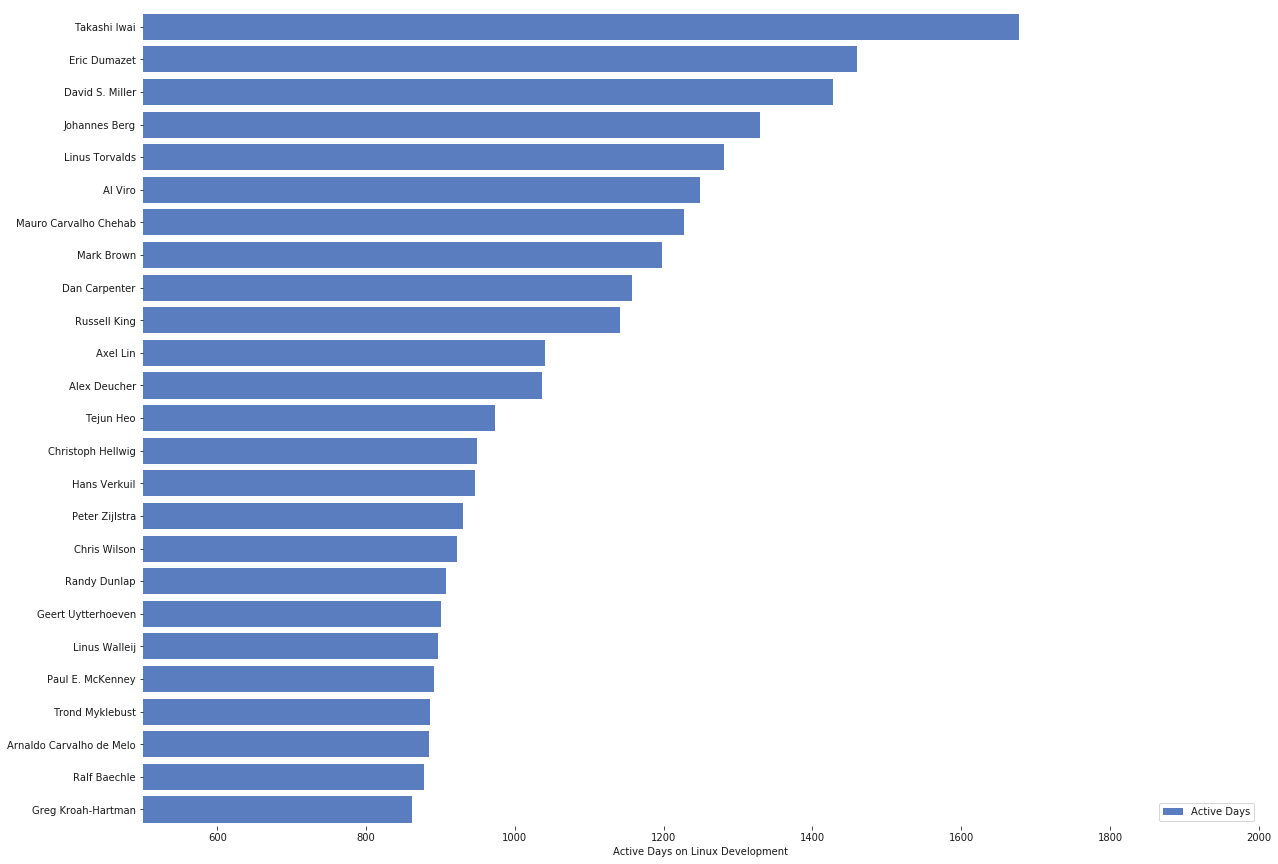

In [50]:
ac_25 = activity_counts.head(25)
plt.subplots(figsize=(20,15))
ax = plt.axes()
sns.barplot(x="active_days", y="author_name", data=ac_25,
            label="Active Days", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(500,2000),ylabel="",
       xlabel="Active Days on Linux Development")
sns.despine(left=True, bottom=True)